<a href="https://colab.research.google.com/github/harshjoshi297/ML-Models-Practice/blob/main/PCA_Assignment_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/wine.csv')

In [ ]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
df.isna().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


We dont have any null values.

In [ ]:
df['Type'].value_counts()

,count
Type,
2,71
1,59
3,48


The dataset doesnt seem to be imbalanced

In [ ]:
df_cols = df.columns

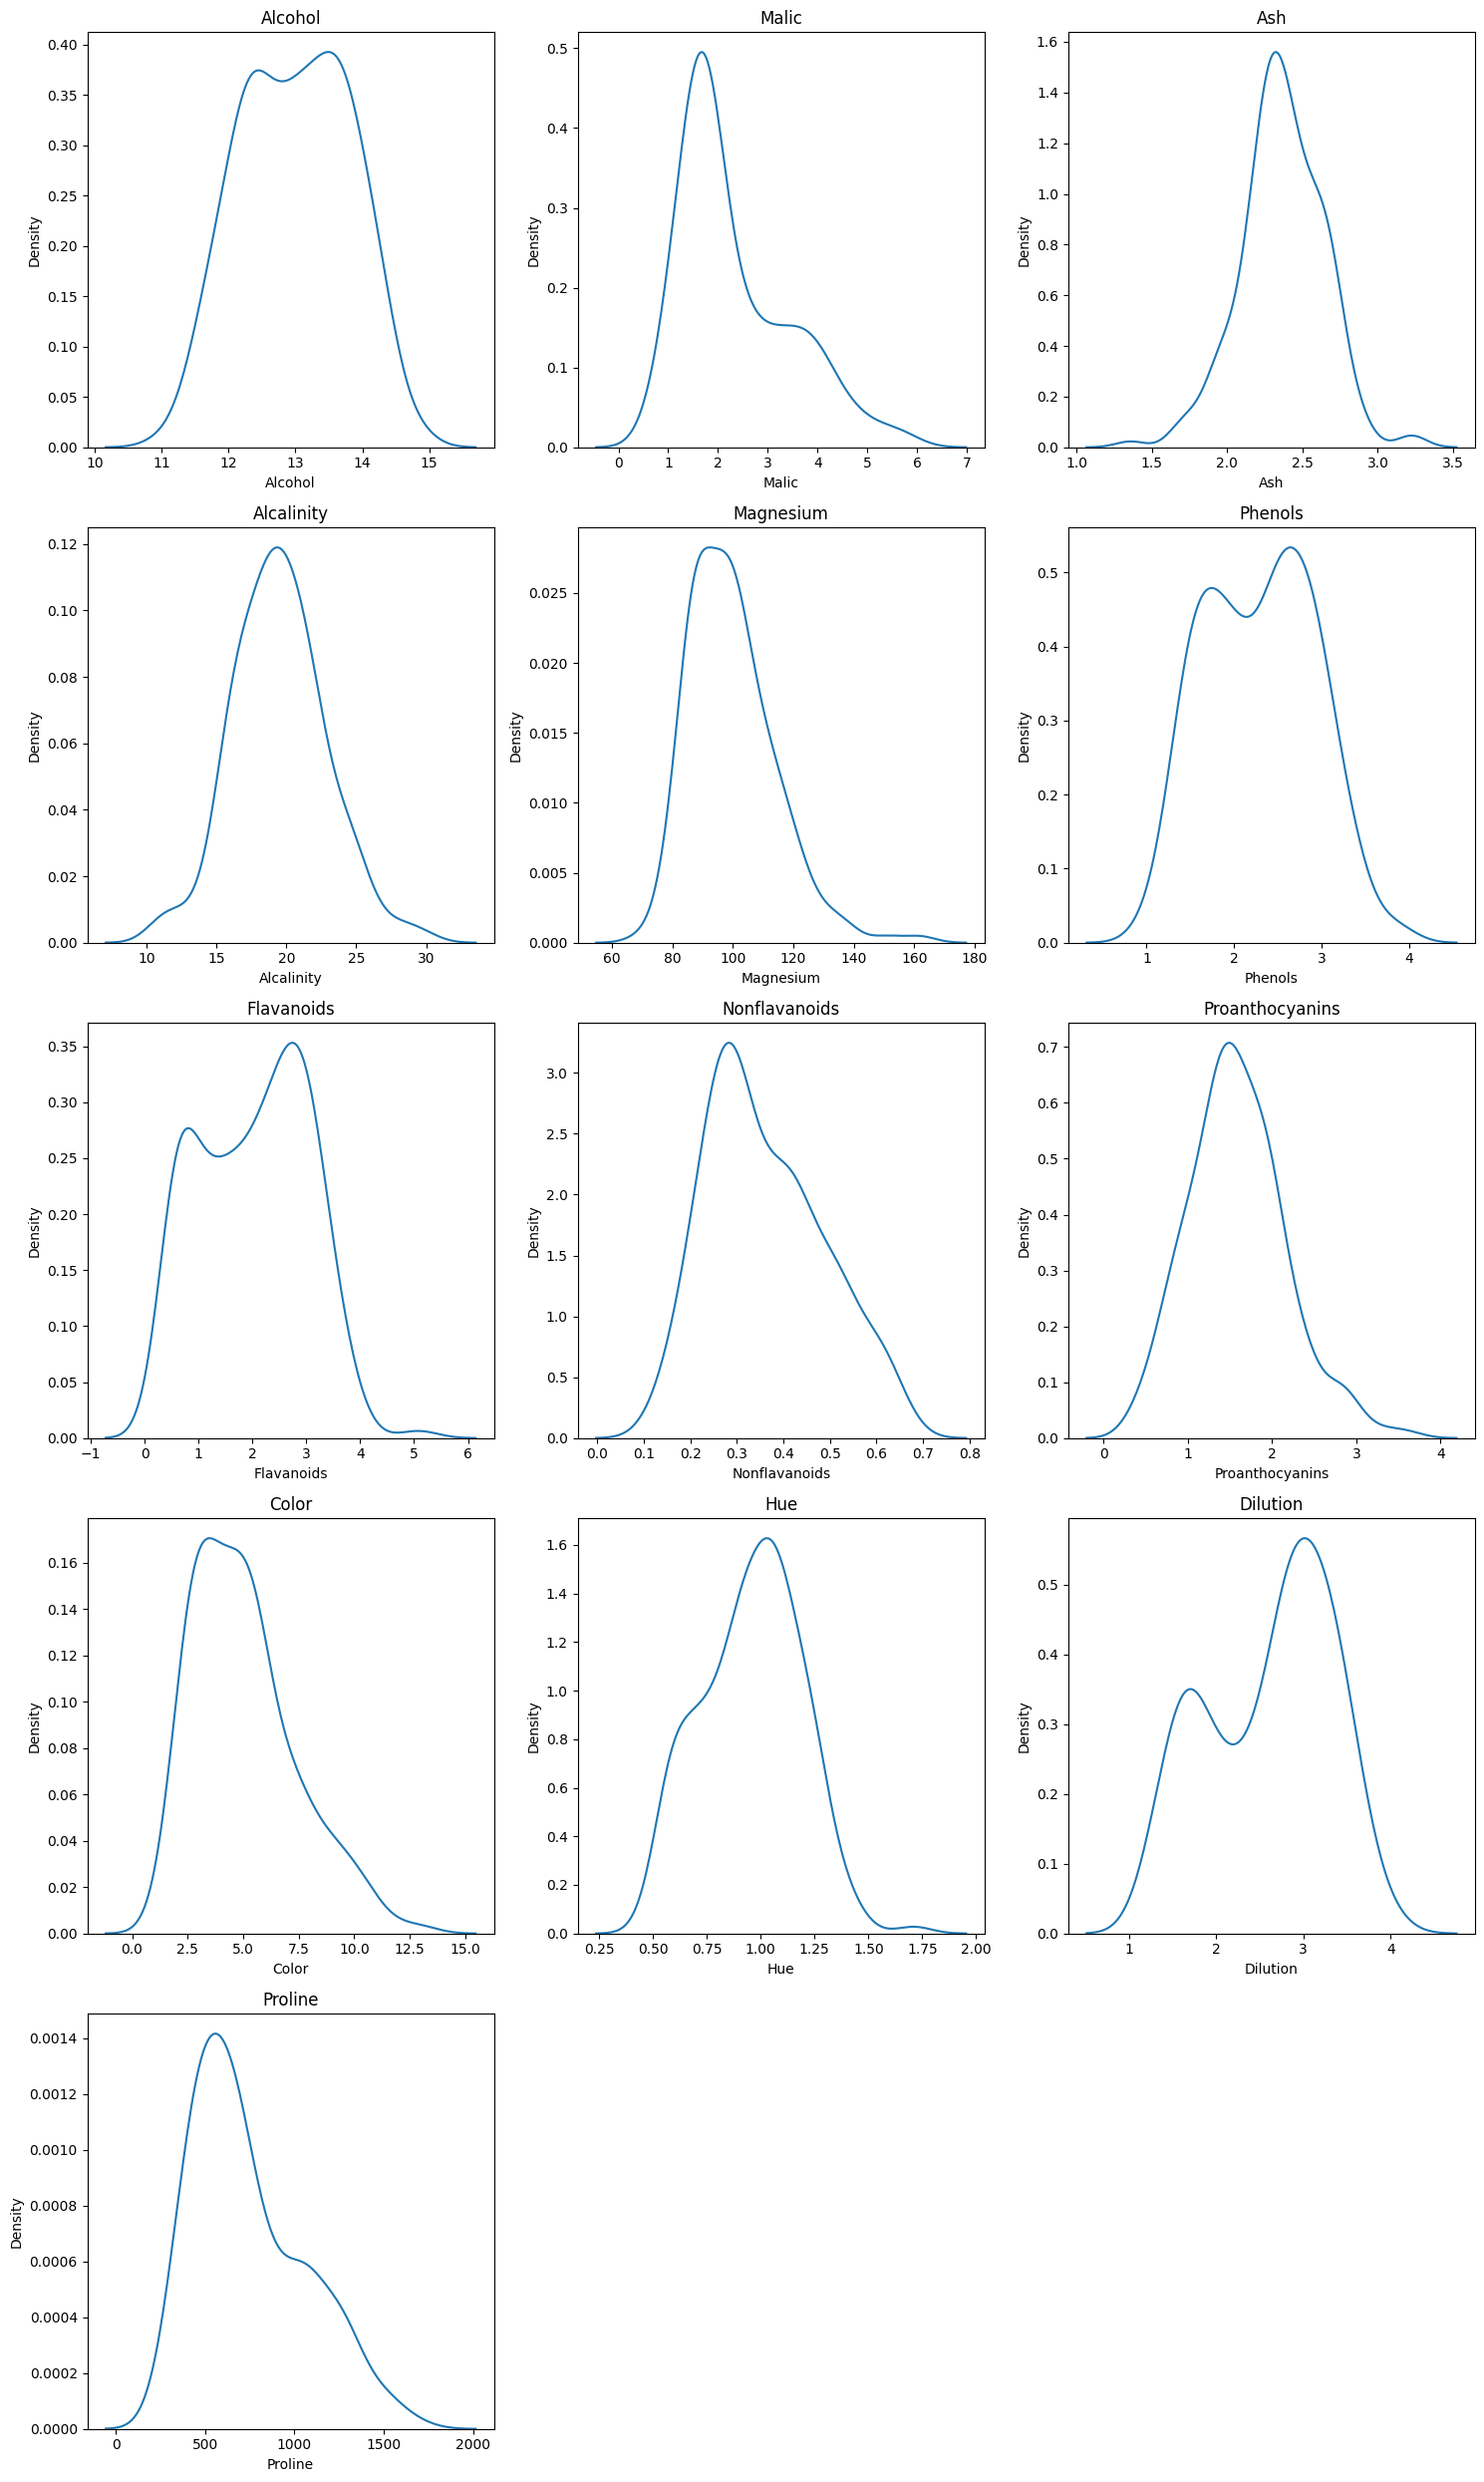

In [ ]:
num_features = len(df_cols) - 1
num_cols_per_row = 3
num_rows = (num_features + num_cols_per_row - 1) // num_cols_per_row

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(df_cols[1:]):
  sns.kdeplot(df[col], ax=axes[i])
  axes[i].set_title(col)

for j in range(num_features, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

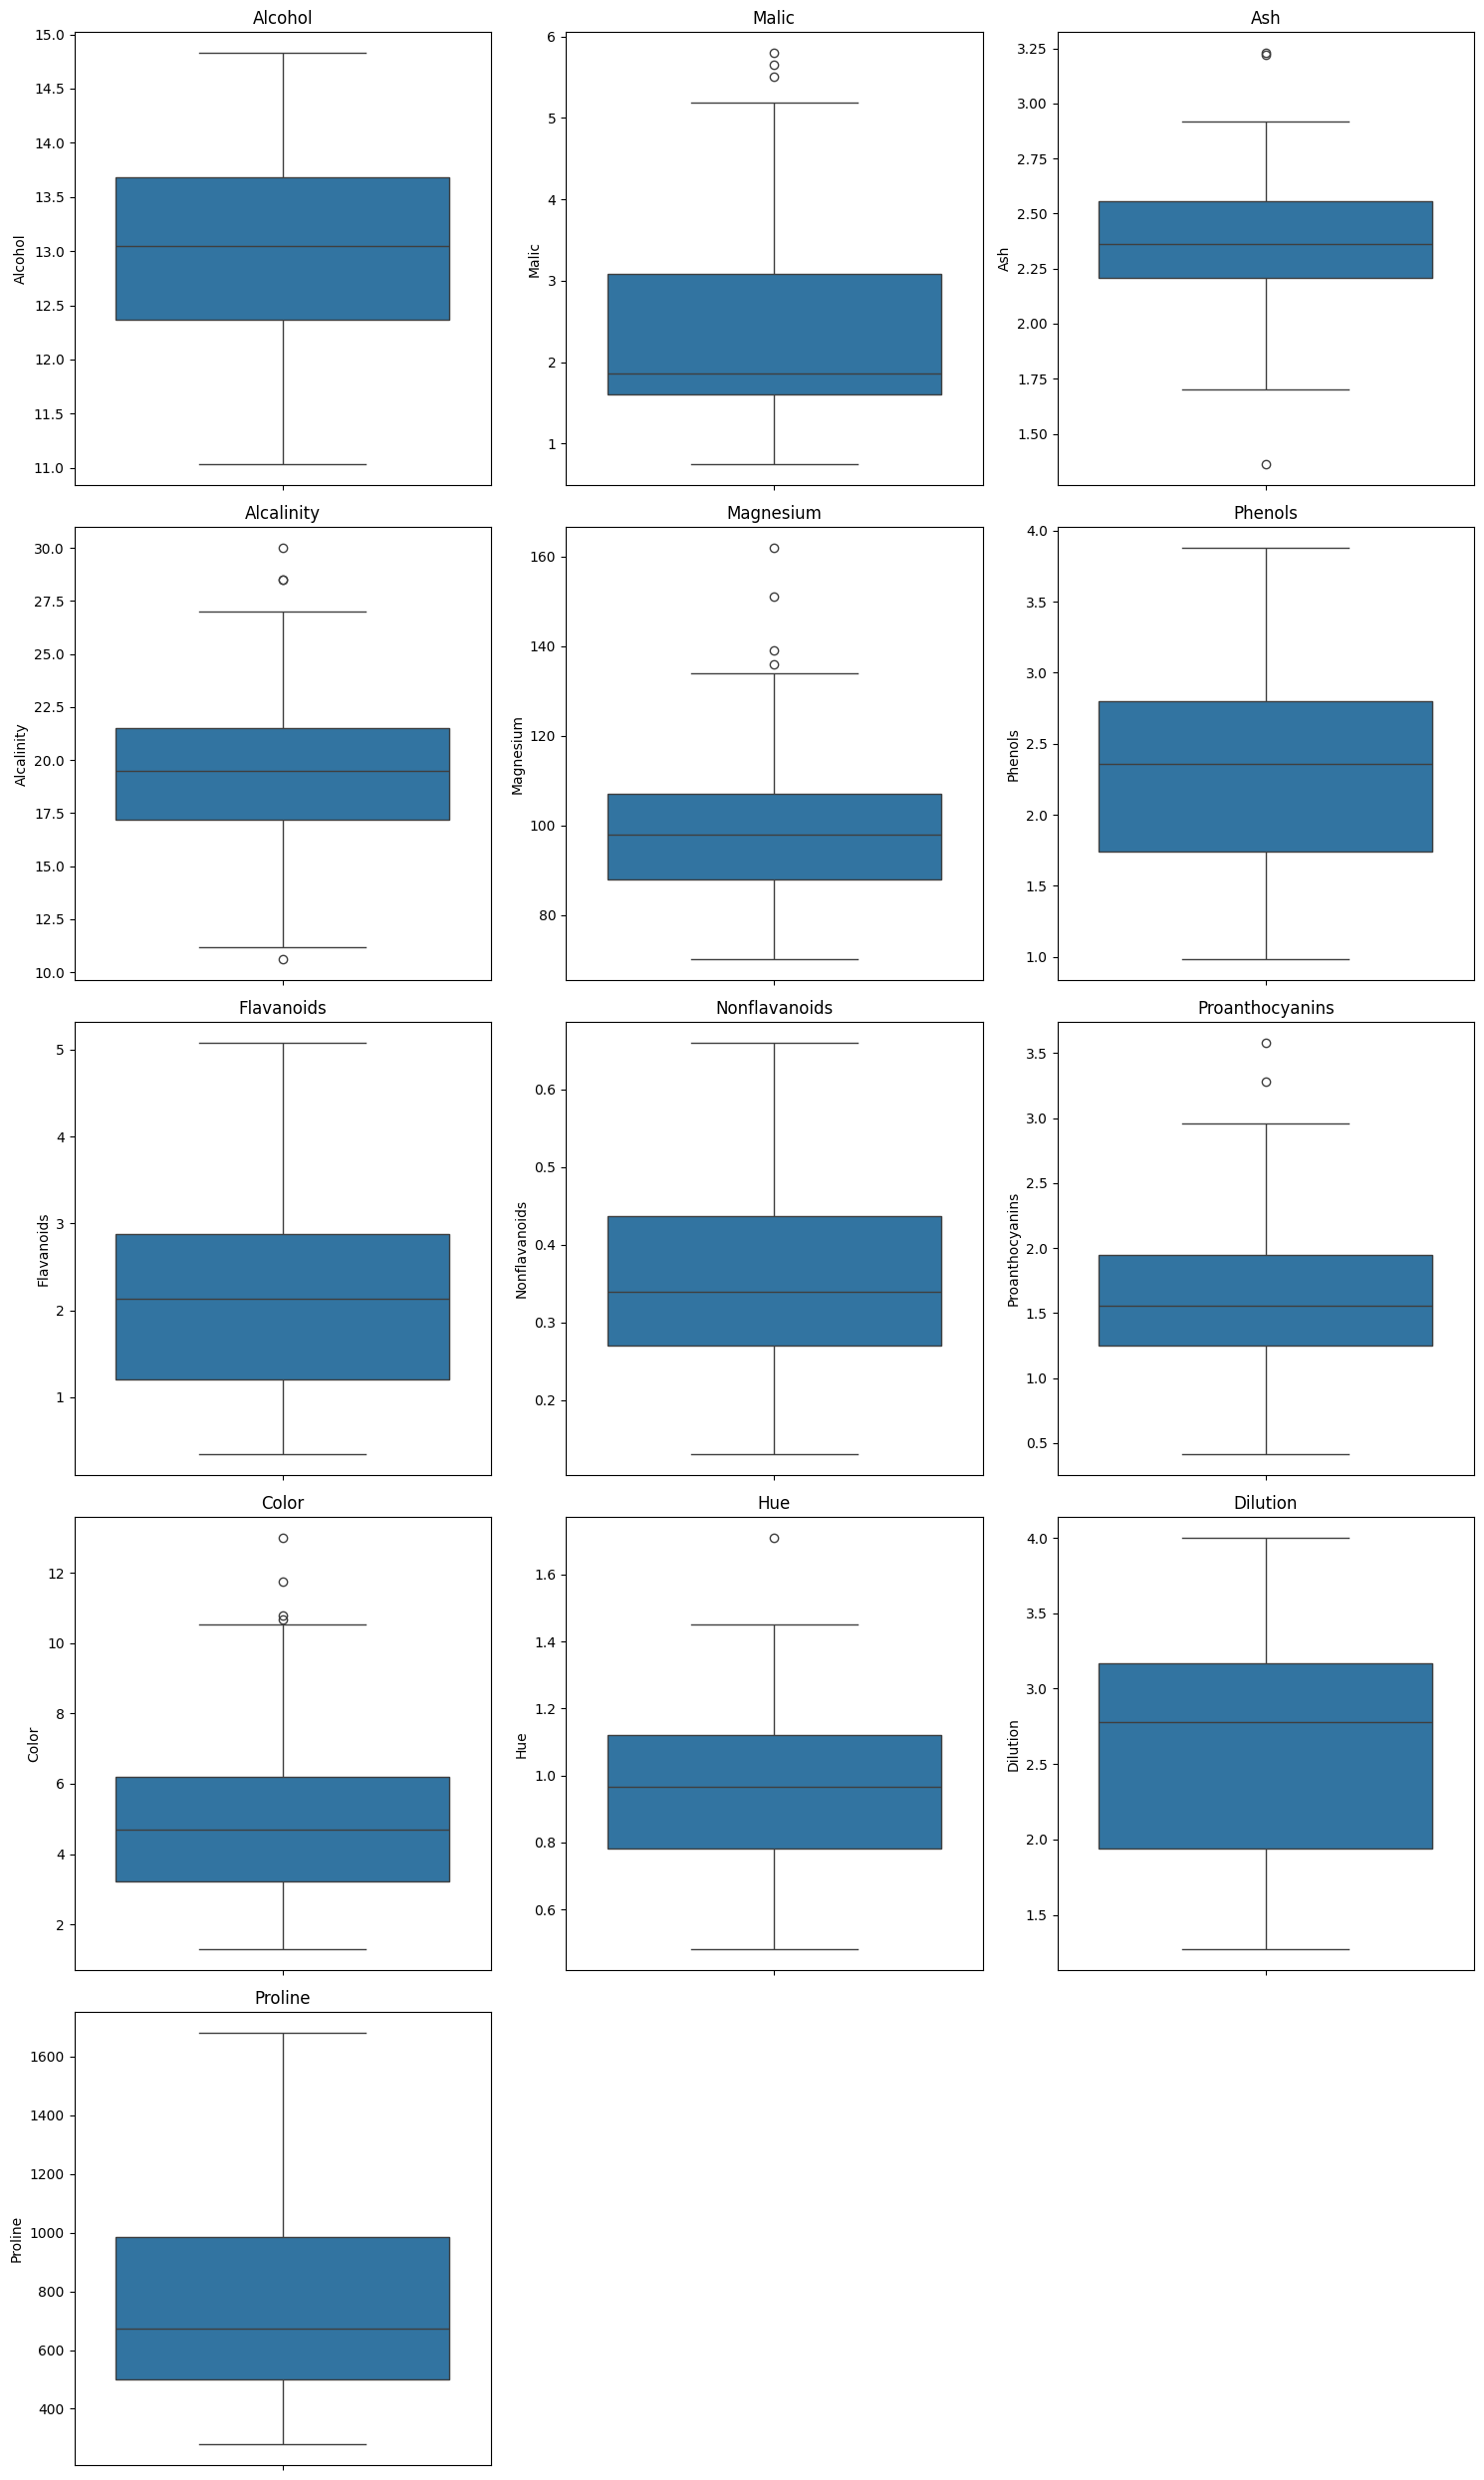

In [ ]:
num_features = len(df_cols) - 1
num_cols_per_row = 3
num_rows = (num_features + num_cols_per_row - 1) // num_cols_per_row

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(df_cols[1:]):
  sns.boxplot(y=df[col], ax=axes[i])
  axes[i].set_title(col)

for j in range(num_features, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

There are a few outliers, but these outliers are just chemical values that do not need to be altered.

In [ ]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


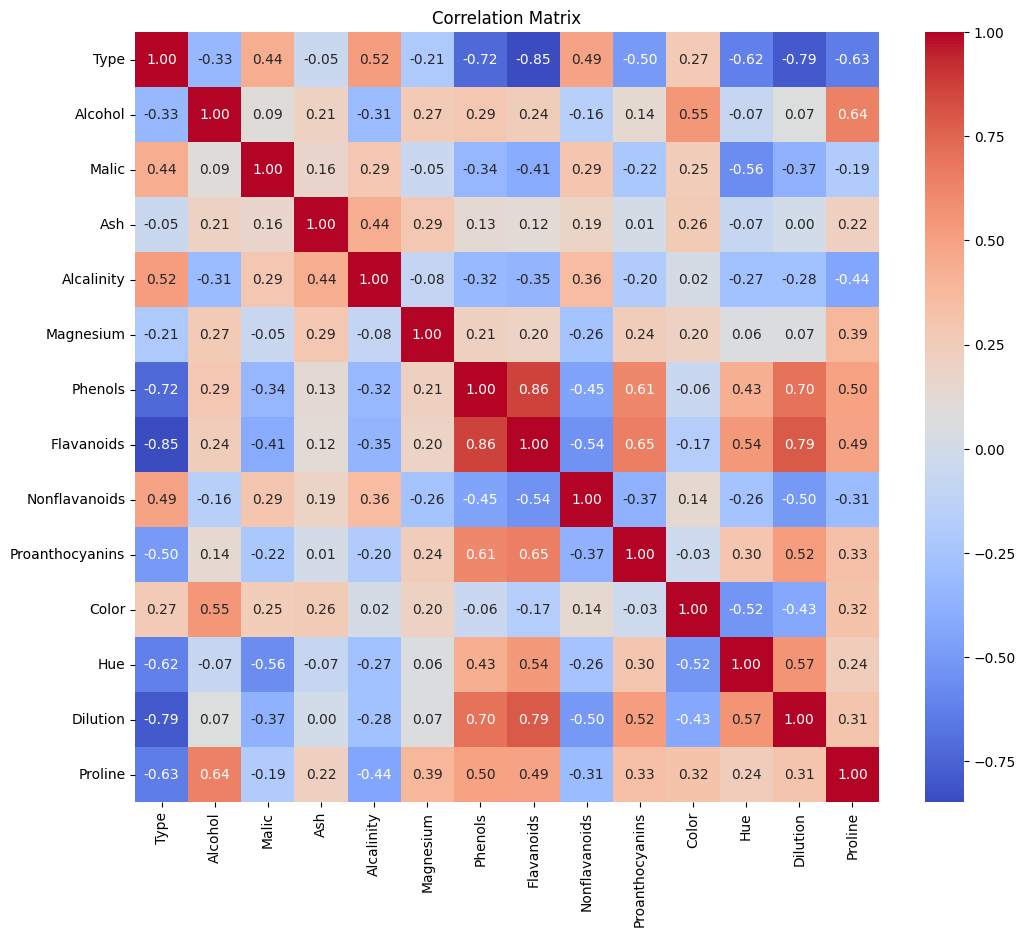

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

We can see that there are some features that are highly correlated.

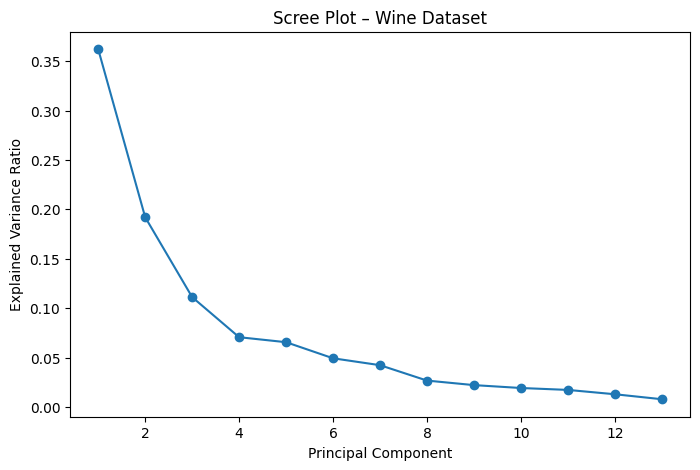

In [ ]:
pca = PCA()
pca.fit(X_scaled)

plt.figure(figsize=(8,5))
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_,
    marker='o'
)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot – Wine Dataset")
plt.show()

Elbow point = 2

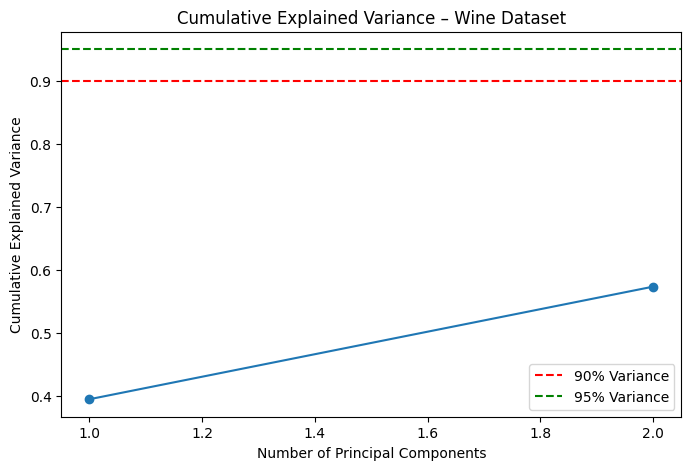

In [18]:
cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance – Wine Dataset")
plt.legend()
plt.show()


# Model without PCA

In [3]:
X = df

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Scaling is important because we are using a distance based algorithm.

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


We are using 3 clusters since we already know that our data is divided into 3 types.

We cant visualize in more than 3 dimensions.

In [6]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.30648398324833453


Measures how well samples fit within their cluster.
Higher value of Silhouette score is better.

In [7]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X_scaled, clusters)
print("Davies–Bouldin Index:", db_score)


Davies–Bouldin Index: 1.315707552261773


Measures cluster compactness & separation.
Lower value is usually better.

# Model with PCA

PCA or Principal Component Analysis is an unsupervised learning algorithm that is used to reduce the dimensions of a dataset.

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters1 = kmeans.fit_predict(X_pca)

In [16]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_pca, clusters1)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.6024415520362845


In [17]:
db_score = davies_bouldin_score(X_pca, clusters1)
print("Davies–Bouldin Index:", db_score)

Davies–Bouldin Index: 0.5397078562575713


I tried multiple values for PCA but found the best results for n_components = 2

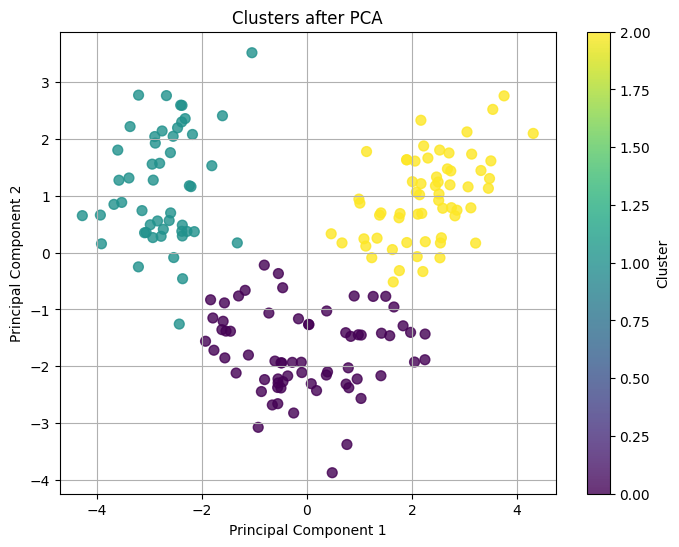

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters1, cmap='viridis', s=50, alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters after PCA')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

For both Silhouette score and davies bouldin score, we achieved a  better score after pca.
It does so by removing redundant features or correlated features.




We obtain more compact clusters when we use PCA compared to non PCA features as correlated columns were removed.
We also see less overlap between the clusters when we apply PCA(Davies–Bouldin Index Observations).


Model without PCA
 1.Silhouette Score: 0.30648398324833453
 2.Davies–Bouldin Index: 1.315707552261773

Model with PCA
1.Silhouette Score: 0.6024415520362845
2.Davies–Bouldin Index: 0.5397078562575713

Applying PCA increases the performance of the model substantially.

Disadavantages
1. Loss of interpretibility of features.

#Conclusion and Insights

1. PCA improves distance-based clustering when features are correlated and high-dimensional.

2. PCA + clustering provides a powerful framework for discovering structure in complex datasets.

3. PCA should mostly be used for a dataset with many features along with multicollinearity.
PCA works best with distance based algorithms.